# Data Science project

# INTRODUCTION

## This project aims to analyze Amazon sales data to uncover trends and insights within various product categories. By examining the dataset for sales metrics, such as product count, prices, and demand, the analysis seeks to highlight which categories are performing best and identify potential areas for growth. Key stages of the project include data cleaning, visualization, and identifying patterns within the data.

## Importing All Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading The Project File

In [2]:
import pandas as pd 
df=pd.read_csv(r"D:\jubin\amazon sales project.csv")

In [3]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False


## Replacing White Spaces and Capitalize

In [4]:
for i in df:
    j=i.replace(' ','_')
    df = df.rename(columns={i:j.capitalize()})
    print(j)

index
Order_ID
Date
Status
Fulfilment
Sales_Channel
ship-service-level
Category
Size
Courier_Status
Qty
currency
Amount
ship-city
ship-state
ship-postal-code
ship-country
B2B


## Identifying all the Null Values

In [5]:
df.isnull().sum()

Index                    0
Order_id                 0
Date                     0
Status                   0
Fulfilment               0
Sales_channel            0
Ship-service-level       0
Category                 0
Size                     0
Courier_status           0
Qty                      0
Currency              7800
Amount                7800
Ship-city               35
Ship-state              35
Ship-postal-code        35
Ship-country            35
B2b                      0
dtype: int64

## Terminating all Unwanted coloums

In [6]:
df1=df.drop(columns=['Order_id','Ship-postal-code'])
df1.isnull().sum()

Index                    0
Date                     0
Status                   0
Fulfilment               0
Sales_channel            0
Ship-service-level       0
Category                 0
Size                     0
Courier_status           0
Qty                      0
Currency              7800
Amount                7800
Ship-city               35
Ship-state              35
Ship-country            35
B2b                      0
dtype: int64

In [7]:
df1.describe()

,Index,Qty,Amount
count,128976.000000,128976.000000,121176.000000
mean,64486.130427,0.904401,648.562176
std,37232.897832,0.313368,281.185041
min,0.000000,0.000000,0.000000
25%,32242.750000,1.000000,449.000000
50%,64486.500000,1.000000,605.000000
75%,96730.250000,1.000000,788.000000
max,128974.000000,15.000000,5584.000000


In [8]:
df1.dropna(inplace=True)
df1

,Index,Date,Status,Fulfilment,Sales_channel,Ship-service-level,Category,Size,Courier_status,Qty,Currency,Amount,Ship-city,Ship-state,Ship-country,B2b
0,0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False
1,1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,False
2,2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,True
3,3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,False
4,4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,IN,False
128972,128971,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,IN,False
128973,128972,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,IN,False
128974,128973,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,IN,False


In [9]:
df1.isnull().sum()

Index                 0
Date                  0
Status                0
Fulfilment            0
Sales_channel         0
Ship-service-level    0
Category              0
Size                  0
Courier_status        0
Qty                   0
Currency              0
Amount                0
Ship-city             0
Ship-state            0
Ship-country          0
B2b                   0
dtype: int64

## Converting the Format of Date

In [10]:
df1['Date']=pd.to_datetime(df1['Date'])


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\1647753005.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date']=pd.to_datetime(df1['Date'])


In [11]:
df1.isnull().sum()

Index                 0
Date                  0
Status                0
Fulfilment            0
Sales_channel         0
Ship-service-level    0
Category              0
Size                  0
Courier_status        0
Qty                   0
Currency              0
Amount                0
Ship-city             0
Ship-state            0
Ship-country          0
B2b                   0
dtype: int64

In [12]:
df1.shape

(121143, 16)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121143 entries, 0 to 128975
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Index               121143 non-null  int64         
 1   Date                121143 non-null  datetime64[ns]
 2   Status              121143 non-null  object        
 3   Fulfilment          121143 non-null  object        
 4   Sales_channel       121143 non-null  object        
 5   Ship-service-level  121143 non-null  object        
 6   Category            121143 non-null  object        
 7   Size                121143 non-null  object        
 8   Courier_status      121143 non-null  object        
 9   Qty                 121143 non-null  int64         
 10  Currency            121143 non-null  object        
 11  Amount              121143 non-null  float64       
 12  Ship-city           121143 non-null  object        
 13  Ship-state          121143 non-nul

In [14]:
df1.tail(10)

,Index,Date,Status,Fulfilment,Sales_channel,Ship-service-level,Category,Size,Courier_status,Qty,Currency,Amount,Ship-city,Ship-state,Ship-country,B2b
128965,128964,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,S,Shipped,1,INR,899.0,KALAMASSERY,KERALA,IN,False
128966,128965,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,Trousers,3XL,Unshipped,1,INR,574.0,Prayagraj (ALLAHABAD),UTTAR PRADESH,IN,False
128967,128966,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1132.0,CHENNAI 600042,TAMIL NADU,IN,False
128969,128968,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.0,Delhi,DELHI,IN,False
128970,128969,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,M,Unshipped,1,INR,612.0,MUMBAI,MAHARASHTRA,IN,False
128971,128970,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,IN,False
128972,128971,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,IN,False
128973,128972,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,IN,False
128974,128973,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,IN,False
128975,128974,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,IN,False


In [15]:
df1.columns

Index(['Index', 'Date', 'Status', 'Fulfilment', 'Sales_channel',
       'Ship-service-level', 'Category', 'Size', 'Courier_status', 'Qty',
       'Currency', 'Amount', 'Ship-city', 'Ship-state', 'Ship-country', 'B2b'],
      dtype='object')

In [16]:
df1.duplicated().sum()

np.int64(155)

In [17]:
df1['Date']=pd.to_datetime(df1['Date'])
df1

,Index,Date,Status,Fulfilment,Sales_channel,Ship-service-level,Category,Size,Courier_status,Qty,Currency,Amount,Ship-city,Ship-state,Ship-country,B2b
0,0,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False
1,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,False
2,2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,True
3,3,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,False
4,4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,IN,False
128972,128971,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,IN,False
128973,128972,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,IN,False
128974,128973,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,IN,False


## Identifying the unique values in each coloums

In [18]:
df1.nunique().to_frame(name='Unique values')


,Unique values
Index,120988
Date,91
Status,12
Fulfilment,2
Sales_channel,1
Ship-service-level,2
Category,9
Size,11
Courier_status,3
Qty,7


In [19]:
df1.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
Index,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14..."
Date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales_channel,[Amazon.in]
Ship-service-level,"[Standard, Expedited]"
Category,"[T-shirt, Shirt, Blazzer, Trousers, Perfume, S..."
Size,"[S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, Free, 5XL]"
Courier_status,"[On the Way, Shipped, Unshipped]"
Qty,"[0, 1, 2, 3, 5, 4, 8]"


## Data After the cleaning process

In [20]:
df1

,Index,Date,Status,Fulfilment,Sales_channel,Ship-service-level,Category,Size,Courier_status,Qty,Currency,Amount,Ship-city,Ship-state,Ship-country,B2b
0,0,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False
1,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,False
2,2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,True
3,3,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,False
4,4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,IN,False
128972,128971,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,IN,False
128973,128972,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,IN,False
128974,128973,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,IN,False


# Data Analysis

##### 1.Which month has the highest number of orders


In [21]:
import calendar
df1['month'] = df1['Date'].dt.month
month_count = df1.groupby(df1['month']).size()
month_count.index = month_count.index.map(lambda x: calendar.month_name[x])
month_count_1 = month_count.reset_index()
month_count_1.columns = ['Month', 'Count']
month_count_1


,Month,Count
0,March,162
1,April,46049
2,May,39525
3,June,35407


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\4293440063.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month',y='Count',data=month_count_1,palette='husl')


<function matplotlib.pyplot.show(close=None, block=None)>

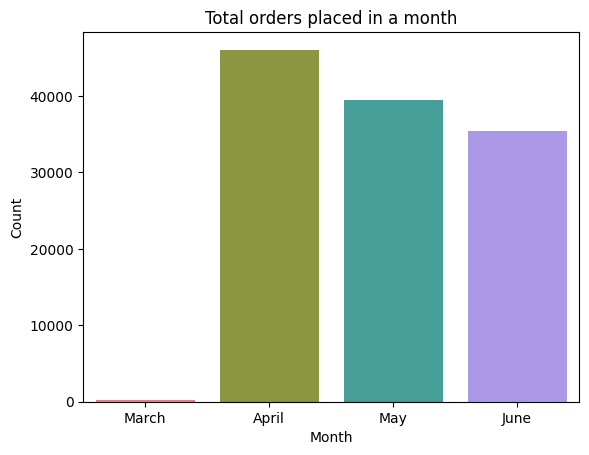

In [22]:
sns.barplot(x='Month',y='Count',data=month_count_1,palette='husl')
plt.title('Total orders placed in a month')
plt.show

## The total count of orders reveals a significant peak in **April** with **46,049** orders, indicating a substantial increase in demand during that month. In contrast, **March** had the lowest total with only **162** orders, suggesting a slow start to the period under review. 

### 2.What is the total count of all order status?

In [23]:
df2=df1.groupby(['Status'],as_index=False).agg(Count=('Status','count')).sort_values(by="Count",ascending=False)
df2

,Status,Count
3,Shipped,77589
5,Shipped - Delivered to Buyer,28741
0,Cancelled,10758
10,Shipped - Returned to Seller,1948
8,Shipped - Picked Up,973
1,Pending,656
2,Pending - Waiting for Pick Up,281
11,Shipped - Returning to Seller,145
7,Shipped - Out for Delivery,35
9,Shipped - Rejected by Buyer,11


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\3440705426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status',y='Count',data=df2, palette='icefire', width=0.5)


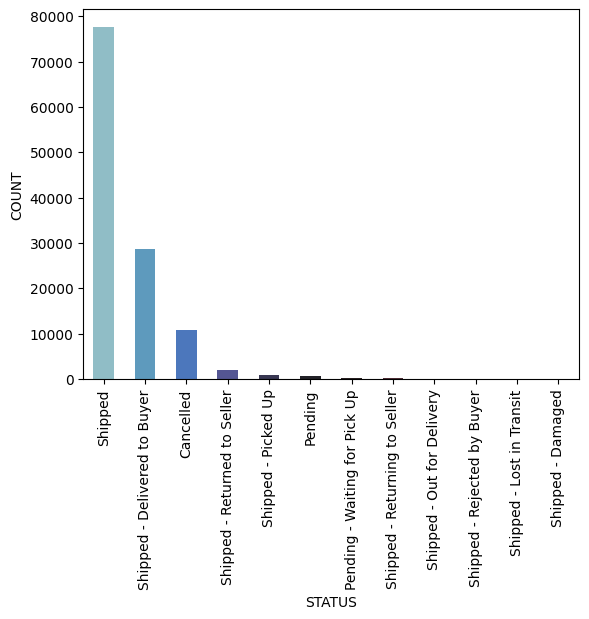

In [24]:
# plt.figure(figsize=(10,6))
sns.barplot(x='Status',y='Count',data=df2, palette='icefire', width=0.5)
plt.xticks(rotation=90)
plt.xlabel('STATUS')
plt.ylabel('COUNT')
plt.show()

## The total count of orders indicates that the majority of shipments are categorized as **"Shipped"** with **77,589** orders, reflecting successful deliveries to buyers. However, there are notable concerns in the system, such as **10,758** cancellations and **1** report of damage, highlighting areas that may require attention to improve overall order fulfillment efficiency.

#### 3.Which category of products has seen the highest number of orders.?

In [25]:
df3=df1.groupby(['Category'],as_index=False).agg(Count=('Category','count')).sort_values(by="Count",ascending=False)
df3

,Category,Count
5,T-shirt,47038
2,Shirt,46695
0,Blazzer,14702
6,Trousers,10157
1,Perfume,1091
7,Wallet,881
4,Socks,420
3,Shoes,156
8,Watch,3


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\2510741547.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category',y='Count',data=df3,palette='husl')


<function matplotlib.pyplot.show(close=None, block=None)>

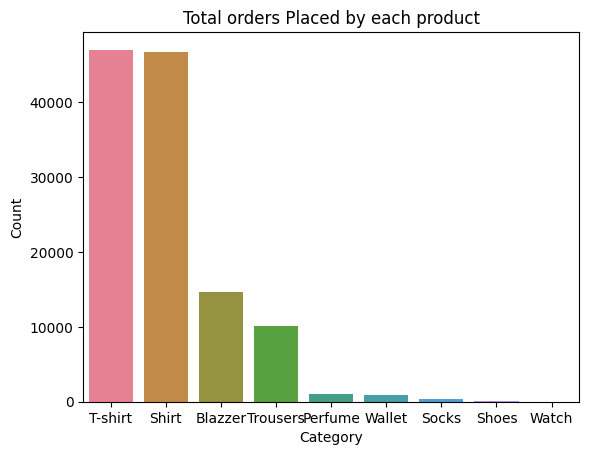

In [26]:
sns.barplot(x='Category',y='Count',data=df3,palette='husl')
plt.title('Total orders Placed by each product')
plt.show

## The total count of orders reveals that **T-shirts** and **Shirts** are the most popular items, with **47,038** and **46,695** orders, respectively, indicating strong consumer demand for these categories. In contrast, **Watches** had the lowest total at just **3** orders, suggesting limited interest for this product.

### 4.Which Category of size has been ordered the most

In [27]:
df4=df1.groupby(['Size'],as_index=False).agg(Count=('Size','count')).sort_values(by="Count",ascending=False)
df4

,Size,Count
6,M,20965
5,L,20477
8,XL,19418
10,XXL,16785
7,S,15645
0,3XL,13884
9,XS,10201
4,Free,2131
3,6XL,705
2,5XL,526


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\2297045232.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Size',y='Count',data=df4,palette='husl')


<function matplotlib.pyplot.show(close=None, block=None)>

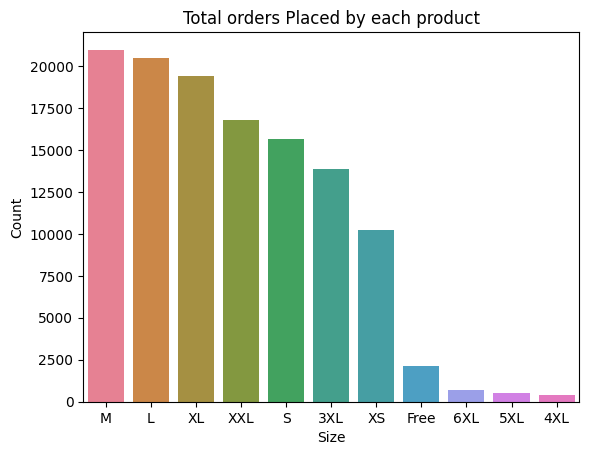

In [28]:
sns.barplot(x='Size',y='Count',data=df4,palette='husl')
plt.title('Total orders Placed by each product')
plt.show

## The total count of orders indicates that sizes **M** and **L** are the most popular, with **20,965** and **20,477** orders, respectively, reflecting a strong preference for these sizes among consumers. Conversely, size **Free** and larger sizes such as **4XL** and **6XL** have significantly lower totals, suggesting they may cater to a more limited audience.

### 5.Identify the top 10 States wich has highest numbers of order placed

In [29]:
df5=df1.groupby(['Ship-state'],as_index=False).agg(Count=('Ship-state','count')).sort_values(by="Count",ascending=False).head(10)
df5

,Ship-state,Count
27,MAHARASHTRA,21084
22,KARNATAKA,16390
55,TAMIL NADU,10813
56,TELANGANA,10636
58,UTTAR PRADESH,9956
13,DELHI,6388
23,KERALA,6143
60,WEST BENGAL,5546
1,ANDHRA PRADESH,5052
18,HARYANA,4184


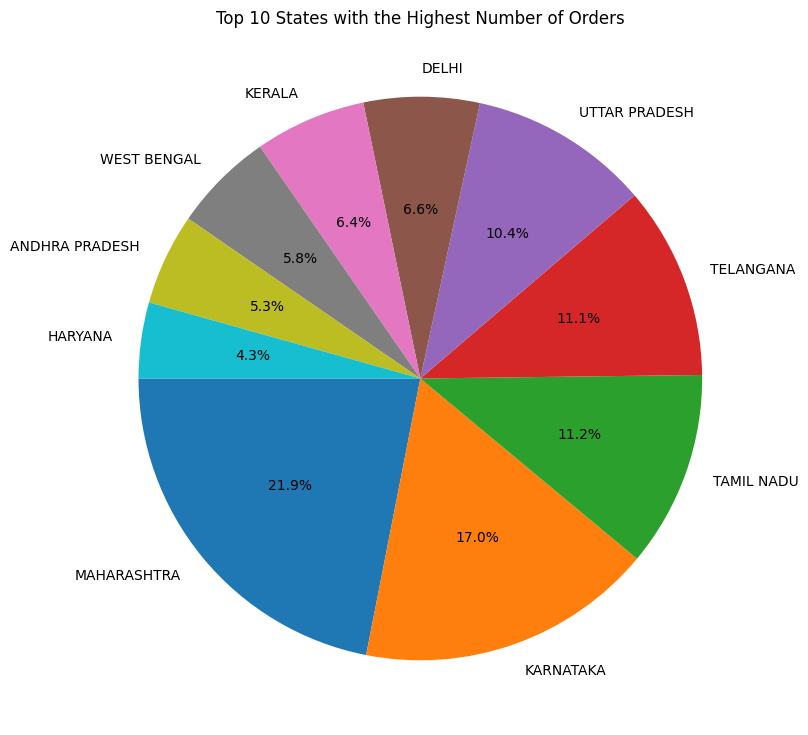

In [30]:
plt.figure(figsize=(8,9))
plt.pie(df5['Count'], labels=df5['Ship-state'], autopct='%1.1f%%', startangle=180)
plt.title('Top 10 States with the Highest Number of Orders')
plt.axis('equal') 
plt.show()


## The total count of orders shows that **Maharashtra** leads with **21,084** orders, indicating a strong market presence in that state. In contrast, **Haryana** has the lowest count at **4,184**, suggesting potential opportunities for growth or increased marketing efforts in that region.

### 6.Identify the top 10 cities wich has highest numbers of order placed

In [31]:
df6=df1.groupby(['Ship-city'],as_index=False).agg(Count=('Ship-city','count')).sort_values(by="Count",ascending=False).head(10)
df6 

,Ship-city,Count
750,BENGALURU,10675
2813,HYDERABAD,7608
4653,MUMBAI,5865
5230,NEW DELHI,5446
1416,CHENNAI,5139
5982,PUNE,3663
3602,KOLKATA,2243
2532,GURUGRAM,1780
7370,THANE,1607
4268,LUCKNOW,1358


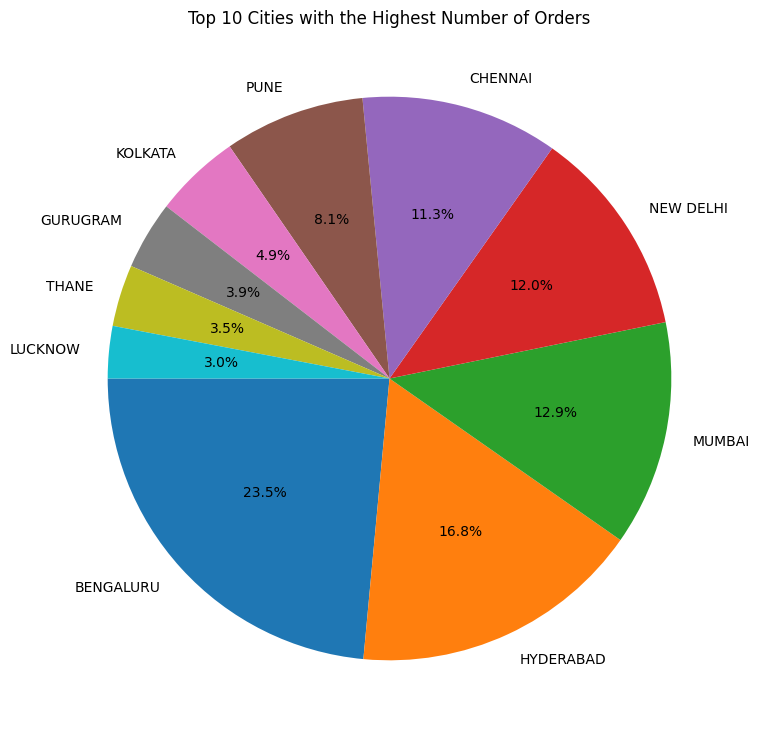

In [32]:
plt.figure(figsize=(8,9))
plt.pie(df6['Count'], labels=df6['Ship-city'], autopct='%1.1f%%', startangle=180)
plt.title('Top 10 Cities with the Highest Number of Orders')
plt.axis('equal') 
plt.show()


## Bengaluru accounts for approximately 23.5% of the total orders, followed by Hyderabad at around 16.8% and Mumbai at about 12.9%. This indicates a strong concentration of orders in these cities, suggesting that targeted marketing and distribution strategies in these areas could enhance overall sales performance.

### 7.What is the total revenue received for each month.?

In [33]:
df1['Date'] = pd.to_datetime(df['Date'])
df1['Year-Month'] = df1['Date'].dt.to_period('M')
df7= df1.groupby('Year-Month')['Amount'].sum().reset_index()
df7['Month'] = df7['Year-Month'].dt.strftime('%B')
df7 = df7[['Month', 'Amount']]
df7

C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\3988283122.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df['Date'])


,Month,Amount
0,March,101683.85
1,April,28827790.27
2,May,26219850.75
3,June,23421223.38


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\2099329217.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Amount', data=df7, palette='husl')


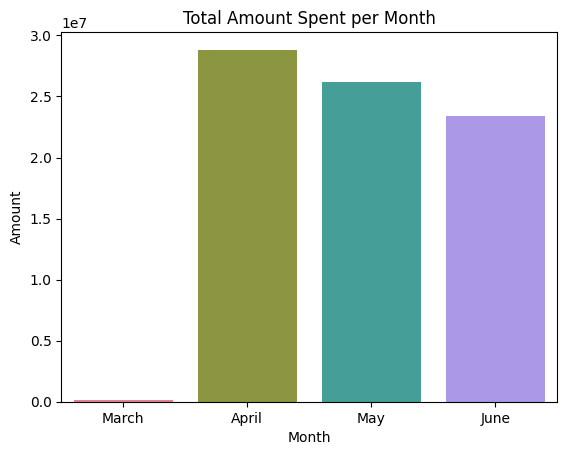

In [34]:
sns.barplot(x='Month', y='Amount', data=df7, palette='husl')
plt.title('Total Amount Spent per Month')
plt.show()


## In the given data, there is a significant increase in amounts from March to April, jumping from 101,683.85 to over 28 million. This trend continues, with substantial figures in May and June, indicating a consistent upward trajectory in financial performance.

### 8.Which month recorded the highest number of canceled orders?

In [35]:
cancelled_orders = df1[df1['Status'] == 'Cancelled']
df8 = cancelled_orders.groupby('Year-Month')['Status'].count().reset_index()
df8['Month'] = df8['Year-Month'].dt.strftime('%B')
df8 = df8[['Month', 'Status']]
df8.rename(columns={'Status': 'Cancelled Orders'}, inplace=True)
df8


,Month,Cancelled Orders
0,March,10
1,April,4222
2,May,3442
3,June,3084


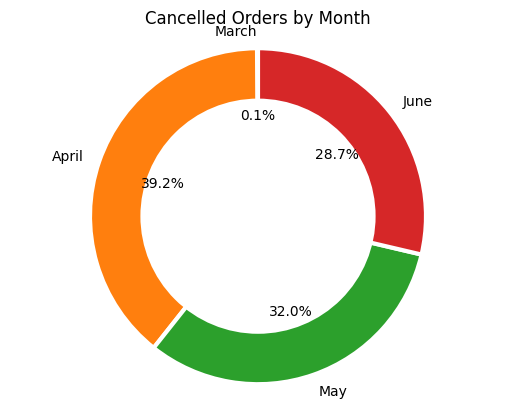

In [36]:
labels = df8['Month']
sizes = df8['Cancelled Orders']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.title("Cancelled Orders by Month")
plt.show()

## April experienced the highest number of canceled orders, with a total of 4,222, significantly outpacing the other months. In contrast, March had the lowest, with only 10 canceled orders, highlighting an increase in cancellations as the months progressed.

## 9.Which city has the highest number of canceled orders?

In [37]:
df9 = df1[df1['Status'] == 'Cancelled']
df_city_cancelled = df9.groupby('Ship-city')['Status'].count().reset_index()
df_city_cancelled.rename(columns={'Status': 'Cancelled Orders'}, inplace=True)
top_cancelled_cities = df_city_cancelled.sort_values(by='Cancelled Orders', ascending=False).head(10)
print(top_cancelled_cities)

      Ship-city  Cancelled Orders
195   BENGALURU               777
689   HYDERABAD               687
1148     MUMBAI               495
360     CHENNAI               455
1284  NEW DELHI               434
1447       PUNE               304
899     KOLKATA               171
1784      THANE               146
618    GURUGRAM               126
1042    LUCKNOW               125


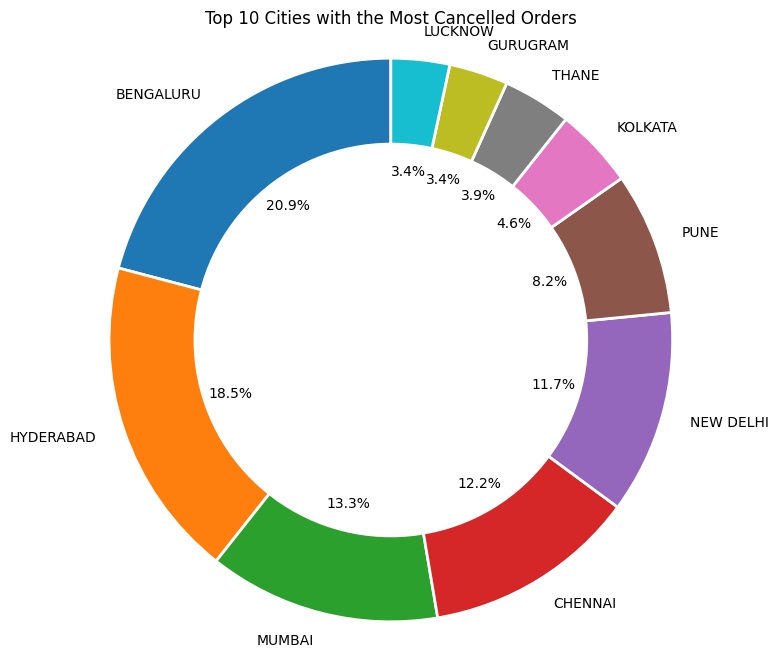

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(top_cancelled_cities['Cancelled Orders'], 
        labels=top_cancelled_cities['Ship-city'], 
        autopct='%1.1f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Top 10 Cities with the Most Cancelled Orders')
plt.show()


## Bengaluru, with 777 canceled orders, represents approximately 20% of the total canceled orders across all listed cities. In contrast, Gurugram and Lucknow, with 126 and 125 canceled orders respectively, account for about 3.4% of the total, highlighting a significant disparity in cancellation rates.

## 10.Which states have the highest number of cancelled orders?

In [39]:
df10= df1[df1['Status'] == 'Cancelled']
df_State_cancelled = df10.groupby('Ship-state')['Status'].count().reset_index()
df_State_cancelled.rename(columns={'Status': 'Cancelled Orders'}, inplace=True)
top_cancelled_State = df_State_cancelled.sort_values(by='Cancelled Orders', ascending=False).head(10)
print(top_cancelled_State)

        Ship-state  Cancelled Orders
24     MAHARASHTRA              1803
19       KARNATAKA              1315
40       TELANGANA               948
39      TAMIL NADU               930
42   UTTAR PRADESH               919
20          KERALA               743
1   ANDHRA PRADESH               526
11           DELHI               504
44     WEST BENGAL               474
14         Gujarat               380


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\1191225178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cancelled_State,


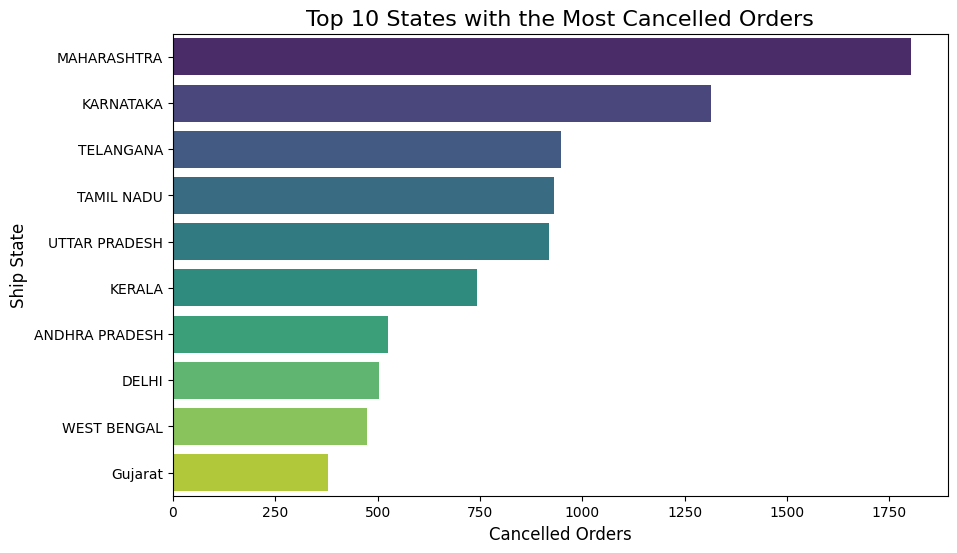

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cancelled_State, 
             x='Cancelled Orders', 
             y='Ship-state', 
             palette='viridis')
plt.title('Top 10 States with the Most Cancelled Orders', fontsize=16)
plt.xlabel('Cancelled Orders', fontsize=12)
plt.ylabel('Ship State', fontsize=12)
plt.show()


## Maharashtra leads with the highest number of cancelled orders at 1,803, followed by Karnataka with 1,315. Other notable states include Telangana and Tamil Nadu, which also report significant cancellations.

### 11.Which item has the highest number of cancelled orders?

In [41]:
df11= df1[df1['Status'] == 'Cancelled']
df_State_cancelled = df11.groupby('Category')['Status'].count().reset_index()
df_State_cancelled.rename(columns={'Status': 'Cancelled Orders'}, inplace=True)
top_cancelled_State = df_State_cancelled.sort_values(by='Cancelled Orders', ascending=False)
print(top_cancelled_State)


   Category  Cancelled Orders
5   T-shirt              4202
2     Shirt              4185
0   Blazzer              1335
6  Trousers               829
1   Perfume                80
7    Wallet                75
4     Socks                40
3     Shoes                12


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\1143447099.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cancelled_State, x='Cancelled Orders', y='Category', palette='husl')


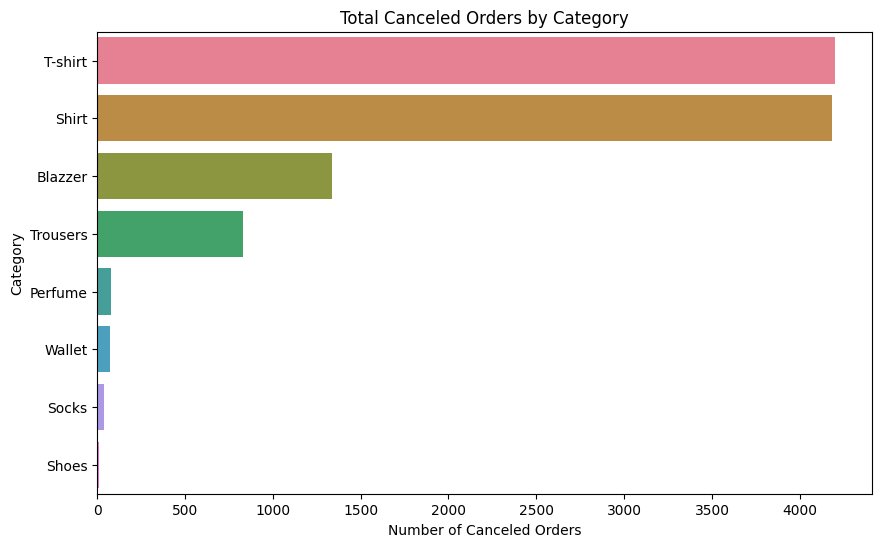

In [42]:
plt.figure(figsize=(10, 6)) 
sns.barplot(data=top_cancelled_State, x='Cancelled Orders', y='Category', palette='husl')
plt.title('Total Canceled Orders by Category')
plt.xlabel('Number of Canceled Orders')
plt.ylabel('Category')
plt.show()


## The T-shirt category has the most cancelled orders, totaling 4,202, closely followed by shirts with 4,185 cancellations. This significant volume suggests that these items may be facing particular issues that warrant further analysis.

### 12.Which size of items has the highest number of cancelled orders?

In [43]:
df12 = df1[df1['Status'] == 'Cancelled'] 
df_Size_cancelled = df12.groupby('Size')['Status'].count().reset_index()
df_Size_cancelled.rename(columns={'Status': 'Cancelled Orders'}, inplace=True)
top_cancelled_Size = df_Size_cancelled.sort_values(by='Cancelled Orders', ascending=False).head(5)
print(top_cancelled_Size)

   Size  Cancelled Orders
6     M              1963
5     L              1821
8    XL              1714
7     S              1471
10  XXL              1393


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\963314812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cancelled_Size, x='Cancelled Orders', y='Size', palette='cividis')


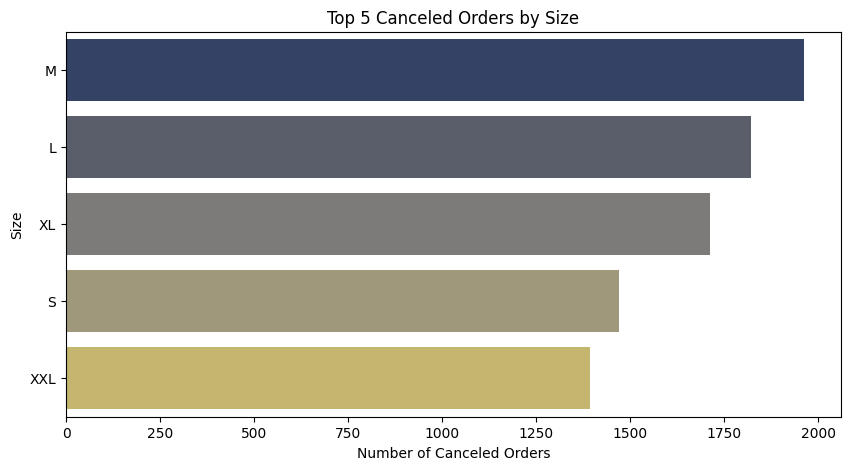

In [44]:

plt.figure(figsize=(10, 5))  
sns.barplot(data=top_cancelled_Size, x='Cancelled Orders', y='Size', palette='cividis')
plt.title('Top 5 Canceled Orders by Size')
plt.xlabel('Number of Canceled Orders')
plt.ylabel('Size')
plt.show()


## The data indicates that medium-sized items have the highest number of cancelled orders, followed by large and extra-large sizes. This trend suggests that medium and large sizes may be more prone to cancellation, potentially highlighting customer preferences or inventory issues.

### 13.Which state generated the highest revenue during the specified period?

In [45]:
df13 = df1.groupby('Ship-state')['Amount'].sum().reset_index()
top_10_states_by_amount = df13.sort_values(by='Amount', ascending=False).head(5)
print(top_10_states_by_amount)

       Ship-state       Amount
27    MAHARASHTRA  13340333.05
22      KARNATAKA  10480694.22
56      TELANGANA   6915018.08
58  UTTAR PRADESH   6823947.08
55     TAMIL NADU   6519182.30


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\2150086625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states_by_amount, x='Ship-state', y='Amount', palette='Blues_d')


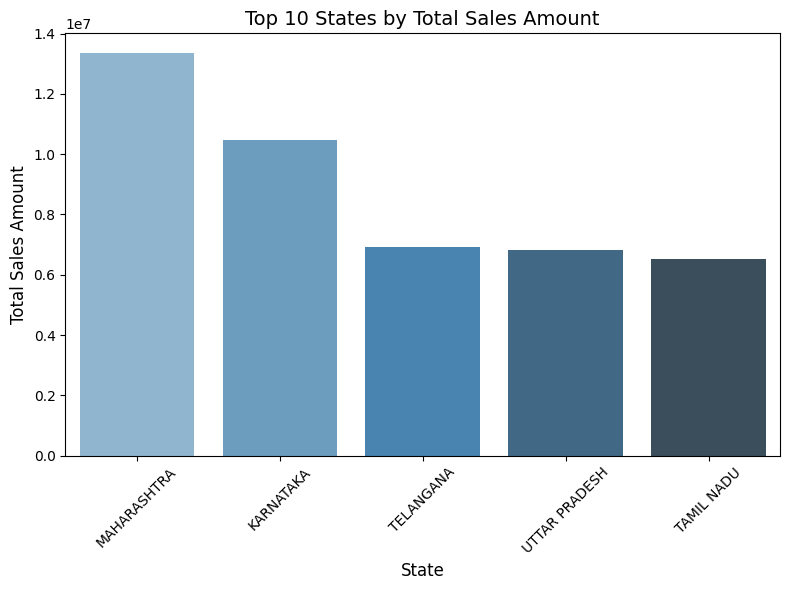

In [46]:
plt.figure(figsize=(8, 6))  
sns.barplot(data=top_10_states_by_amount, x='Ship-state', y='Amount', palette='Blues_d')
plt.title('Top 10 States by Total Sales Amount', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Maharashtra generated the most revenue, totaling over 13.3 million, significantly outperforming other states. Karnataka followed as the second-highest contributor, with just over 10.4 million.

### 14.Which city generated the highest revenue during the specified period?

In [47]:
df14 = df1.groupby('Ship-city')['Amount'].sum().reset_index()
top_10_city_by_amount = df14.sort_values(by='Amount', ascending=False).head(5)
print(top_10_city_by_amount)

      Ship-city      Amount
750   BENGALURU  6845390.65
2813  HYDERABAD  4946394.25
4653     MUMBAI  3701843.04
5230  NEW DELHI  3612512.78
1416    CHENNAI  3103415.74


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\3214232380.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_city_by_amount, x='Ship-city', y='Amount', palette='Blues_d')


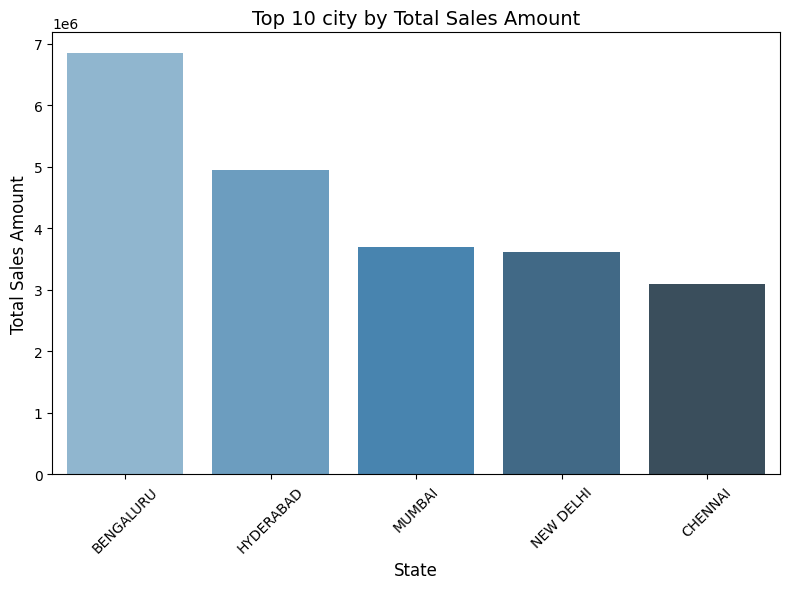

In [48]:
plt.figure(figsize=(8, 6))  
sns.barplot(data=top_10_city_by_amount, x='Ship-city', y='Amount', palette='Blues_d')
plt.title('Top 10 city by Total Sales Amount', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Bengaluru generated the highest revenue, amounting to approximately 6.8 million, making it the top-performing city. Hyderabad followed in second place with just under 5 million, while Mumbai, New Delhi, and Chennai contributed significantly less.

### 15.Which category of products generated the most revenue

In [49]:
df15= df1.groupby('Category')['Amount'].sum().reset_index()
top_10_Category_by_amount = df15.sort_values(by='Amount', ascending=False).head(5)
print(top_10_Category_by_amount)

   Category       Amount
5   T-shirt  39197808.65
2     Shirt  21289304.08
0   Blazzer  11214369.12
6  Trousers   5344813.30
1   Perfume    789419.66


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\3531526035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_Category_by_amount, x='Category', y='Amount', palette='husl')


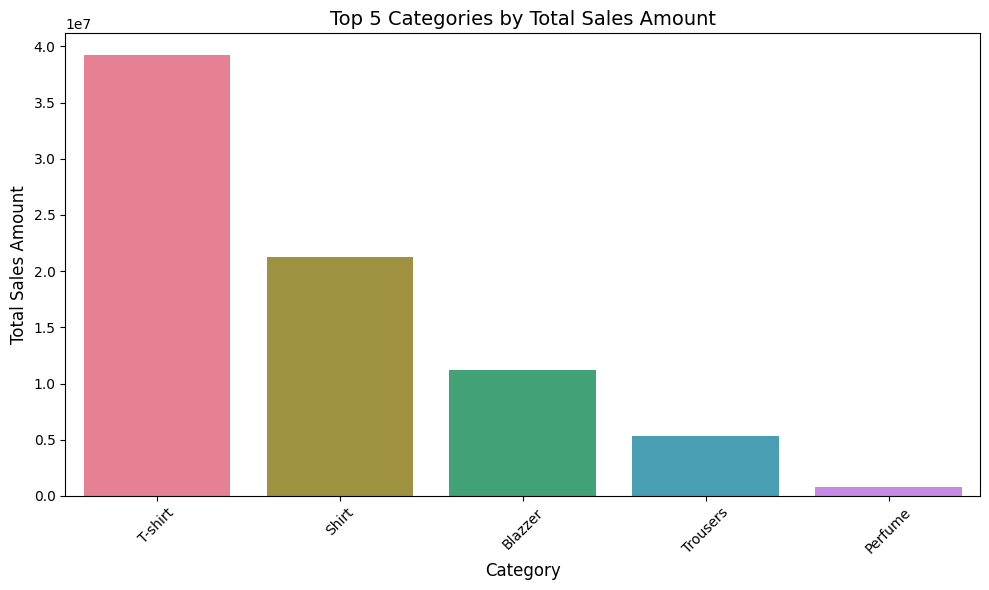

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_Category_by_amount, x='Category', y='Amount', palette='husl')
plt.title('Top 5 Categories by Total Sales Amount', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The T-shirt category has the highest sales amount at 39,197,808.65, while Perfume has the lowest at 789,419.66. This indicates a significantly stronger consumer demand for T-shirts over other categories, with Blazers, Trousers, and Perfumes seeing comparatively lower sales.

### 16.which products has the lowest order counts

In [51]:
df16=df1.groupby(['Category'],as_index=False).agg(Count=('Category','count')).sort_values(by="Count",ascending=True).head(5)
df16

,Category,Count
8,Watch,3
3,Shoes,156
4,Socks,420
7,Wallet,881
1,Perfume,1091


C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\3936548455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=df16, palette='viridis')


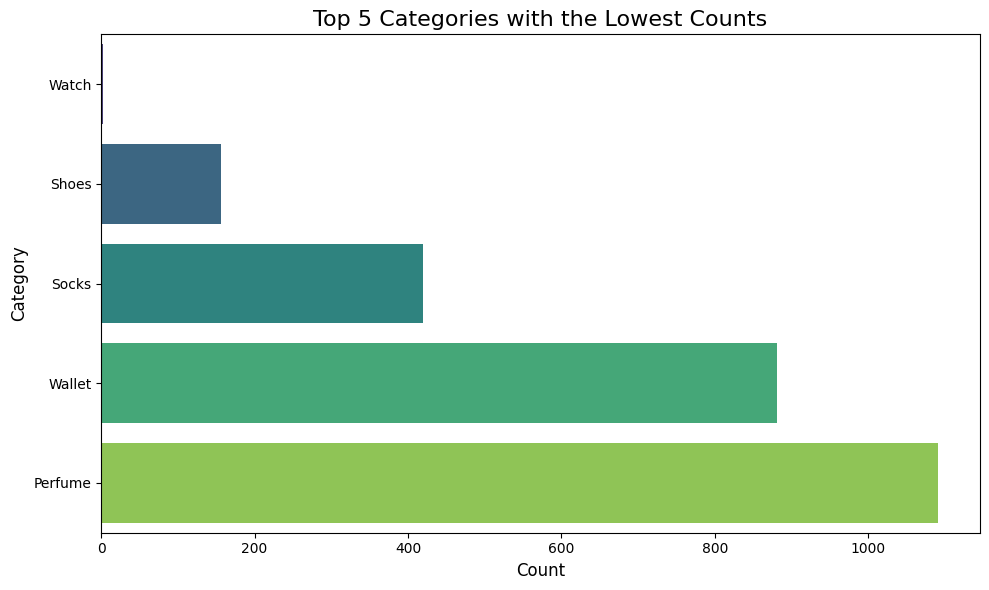

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Category', data=df16, palette='viridis')
plt.title('Top 5 Categories with the Lowest Counts', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

## The data shows that Perfume has the highest item count at 1,091, followed closely by Wallets with 881. Watches have the lowest count, indicating they may be less in demand or sold at a lower frequency compared to other items.


## 17. Find the median of all products in respective of amount

In [53]:
df17 = df.groupby('Category')['Amount'].median()
df17

Category
Blazzer     744.0
Perfume     837.0
Shirt       435.0
Shoes       800.0
Socks       345.0
T-shirt     788.0
Trousers    522.0
Wallet      545.0
Watch       305.0
Name: Amount, dtype: float64

C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\1855392753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df17, x='Category', y='Amount', palette='pastel')


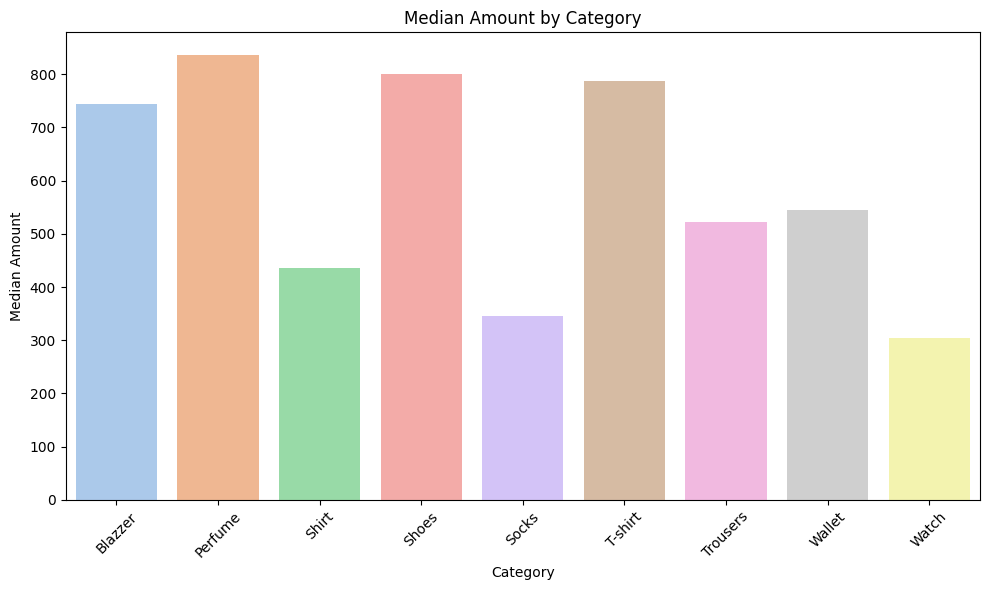

In [54]:
df17 = df17.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df17, x='Category', y='Amount', palette='pastel')
plt.title('Median Amount by Category')
plt.xlabel('Category')
plt.ylabel('Median Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## The average sales prices reveal that Perfume leads with an average of $837.00, indicating strong demand for this category, while Watch has the lowest average at $305.00, suggesting it is the least popular product.

## 18. Find the mean of all products in respective of amount

In [55]:
df18 = df.groupby('Category')['Amount'].mean()
df18

Category
Blazzer     762.776584
Perfume     723.574390
Shirt       455.928116
Shoes       799.697179
Socks       358.946429
T-shirt     833.317534
Trousers    526.209281
Wallet      520.327106
Watch       305.000000
Name: Amount, dtype: float64

C:\Users\Hp\AppData\Local\Temp\ipykernel_8224\3315063330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df18, x='Category', y='Amount', palette='muted')


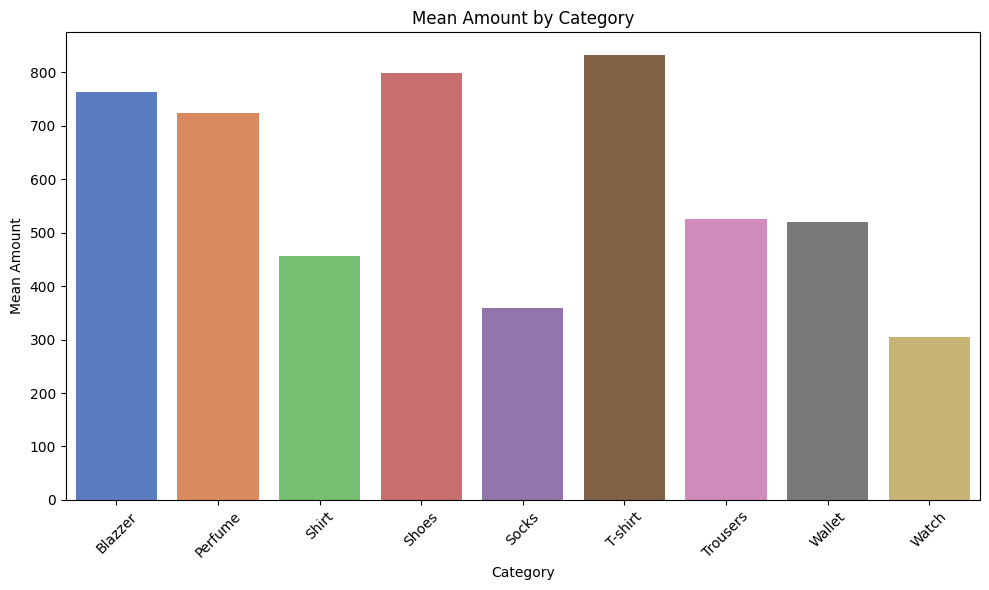

In [56]:
df18 = df18.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df18, x='Category', y='Amount', palette='muted')
plt.title('Mean Amount by Category')
plt.xlabel('Category')
plt.ylabel('Mean Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The Average sales prices indicate that T-shirt and Shoes are the most premium categories, with Average prices of approximately 833.32 and $799.70, respectively. In contrast, Watch has the lowest Average price at 305.00, suggesting a more budget-friendly positioning within the product range.

## CONCLUSION

### In conclusion, the analysis highlights significant insights into Amazon sales trends across different product categories, regions, and customer preferences. April emerged as a peak month for order volume, with Maharashtra and Karnataka as leading regions and Bengaluru as the top city for sales. While T-shirts and Shirts showed high demand, Watches had notably lower interest, suggesting room for strategic adjustments. 

### The data also points to areas for operational improvement, particularly in managing cancellations, which were notably high for T-shirts and medium to large-sized items. Revenue analysis confirms T-shirts as the top revenue-generating category, while Perfumes, although lower in count, retained strong demand through higher average prices. Future efforts could focus on optimizing inventory for popular sizes and exploring growth opportunities in underperforming regions and product categories.